<a href="https://colab.research.google.com/github/ChaelinL/Deeplearning_for_everyone/blob/main/16%EC%9E%A5_%EC%8B%A4%EC%8A%B5(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 손글씨 인식하기: 컨볼루션(CNN) 신경망 적용

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np


# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))  # 32개의 3*3 형식 커넬 사용, 28*28 크기의 흑백(1) 이미지 사용 -- cf. 색상은 3
model.add(Conv2D(64, (3,3), activation='relu'))  # 컨볼루션 층 하나 더 추가
model.add(MaxPooling2D(pool_size=(2,2)))  # 맥스풀링을 통해 결과 간소화
model.add(Dropout(0.25))  # 드롭아웃을 통해 과적합 방지. 이 경우 총 노드 중 25%의 노드를 끈다는 뜻.
model.add(Flatten())  # 맥스풀링과 드롭아웃은 2차원 배열이기 때문에 1차원 배열로 변경

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [3]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간
modelpath = "./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print(f"\n Test Accuracy: {round(model.evaluate(X_test, y_test)[1], 4)}")


Epoch 1: val_loss improved from inf to 0.08116, saving model to ./MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.08116 to 0.05965, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.05965 to 0.05232, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.05232 to 0.05003, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.05003 to 0.04773, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.04773 to 0.04414, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.04414 to 0.04114, saving model to ./MNIST_MLP.hdf5

Epoch 8: val_loss improved from 0.04114 to 0.04109, saving model to ./MNIST_MLP.hdf5

Epoch 9: val_loss improved from 0.04109 to 0.03849, saving model to ./MNIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.03849

Epoch 11: val_loss did not improve from 0.03849

Epoch 12: val_loss did not improve from 0.03849

Epoch 13: val_loss did not improve from 0.03849

Epoch 14: val_loss did not improv

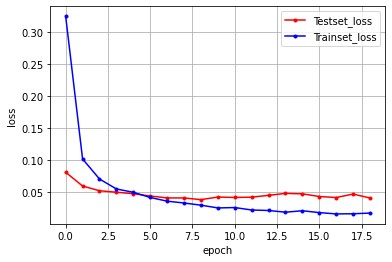

In [4]:
# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현하기
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

=> 9번째 에포크에서 베스트 모델, 테스트 정확도는 99.15%로 향상됨.

=> 컨볼루션 신경망 모델로 만든 학습셋과 테스트셋의 오차가 이전의 얕은 구조로 만든 딥러닝 모델보다 작아짐!!